In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os 

Text(0, 0.5, '$\\int |E|^2 dx$')

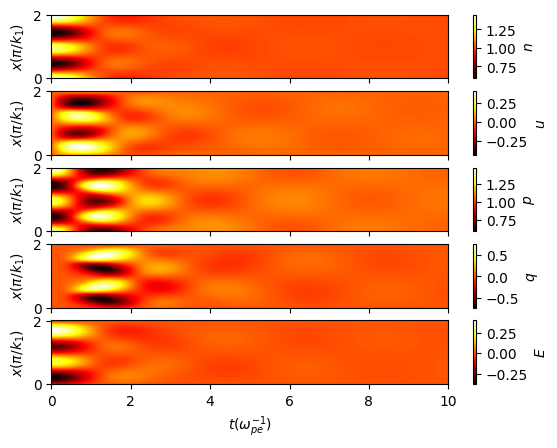

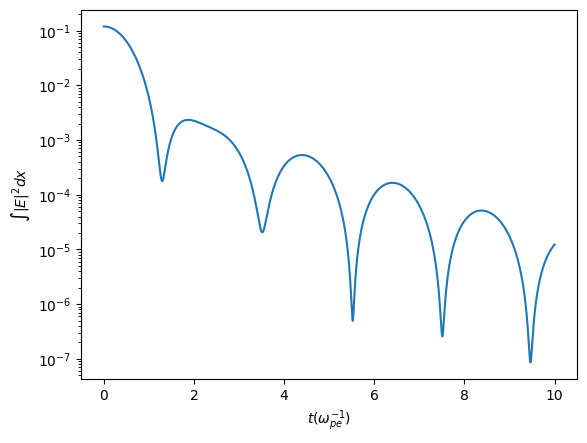

In [19]:
field_labels = ["n", "u", "p", "q", "E"]

data = np.load("simulation/data.npz")
X, T = data["X"],data["T"]
X /= X.max()/2 
x, t = X[0,:], T[:,0]
field = [data[key] for key in field_labels]

fig, ax = plt.subplots(len(field_labels),1,sharex=True)
for n in range(len(field)):
    pcm = ax[n].pcolormesh(T,X,field[n],cmap="hot")
    ax[n].set_ylabel("$x(\pi/k_1)$")
    fig.colorbar(pcm, ax=ax[n], label=f"${field_labels[n]}$")
ax[n].set_xlabel("$t(\omega_{pe}^{-1})$")

plt.figure()
E = field[-1]
E_sqr = (E**2).sum(axis=1)*(x[1]-x[0])
plt.semilogy(t,E_sqr)
plt.xlabel("$t(\omega_{pe}^{-1})$")
plt.ylabel("$\int |E|^2 dx$")